In [1]:
import cogsworth
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.units as u

In [2]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
pd.options.display.max_columns = 999

In [3]:
p = cogsworth.pop.Population(1000, use_default_BSE_settings=True)
p.create_population()
p.get_observables(filters=["Gaia_G_EDR3"], ignore_extinction=True,
                  assume_mw_galactocentric=True, silence_bounds_warning=True)

Run for 1000 binaries
Ended up with 1329 binaries with m1 > 0 solar masses
[8e-03s] Sample initial binaries
[0.3s] Evolve binaries (run COSMIC)


1333it [00:01, 897.50it/s]                          


[2.1s] Get orbits (run gala)
Overall: 2.5s


,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,Gaia_G_EDR3_app_1,Gaia_G_EDR3_app_2,teff_obs,log_g_obs,secondary_brighter,Gaia_G_EDR3_abs_1,Gaia_G_EDR3_abs_2
0,0.0,0.0,8.212644,22.636906,10.486759,24.911021,23.195293,inf,3782.350100,4.798970,False,8.771031,inf
1,0.0,0.0,9.186894,24.970691,9.540092,25.323889,24.878667,inf,3720.596323,4.951653,False,9.094869,inf
2,0.0,0.0,2.704102,17.641798,6.254776,21.192472,17.488689,inf,5962.959471,3.861882,False,2.550992,inf
3,0.0,0.0,10.646162,25.045053,12.582136,26.981027,26.002653,inf,3233.950873,5.035061,False,11.603762,inf
4,0.0,0.0,7.102408,21.095878,8.206484,22.199954,20.933398,inf,4600.541074,4.739205,False,6.939928,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,0.0,0.0,10.517918,25.280915,12.477575,27.240572,26.262050,inf,3233.264379,5.014174,False,11.499053,inf
1325,0.0,0.0,13.983956,28.881354,5.651105,20.548503,20.519385,inf,5166.291212,4.540739,True,5.621987,inf
1326,0.0,0.0,10.683184,26.486249,12.792633,28.595697,27.133524,inf,3429.288803,5.100801,False,11.330459,inf
1327,0.0,0.0,15.749138,30.115770,inf,inf,30.443094,inf,4047.740694,7.989611,False,16.076461,inf


In [9]:
bound_prim_obs_nums, sec_obs_nums = p.get_gaia_observed_bin_nums(
    ra='auto', dec='auto'
)

In [5]:
obs_Gs = np.concatenate(
    (p.observables.loc[bound_prim_obs_nums]["Gaia_G_EDR3_app_1"].values,
     p.observables.loc[sec_obs_nums]["Gaia_G_EDR3_app_2"].values)
)
unobs_Gs = np.concatenate(
    (p.observables.loc[~p.observables.index.isin(bound_prim_obs_nums)]["Gaia_G_EDR3_app_1"].values,
     p.observables.loc[~p.observables.index.isin(sec_obs_nums)]["Gaia_G_EDR3_app_2"].values)
)

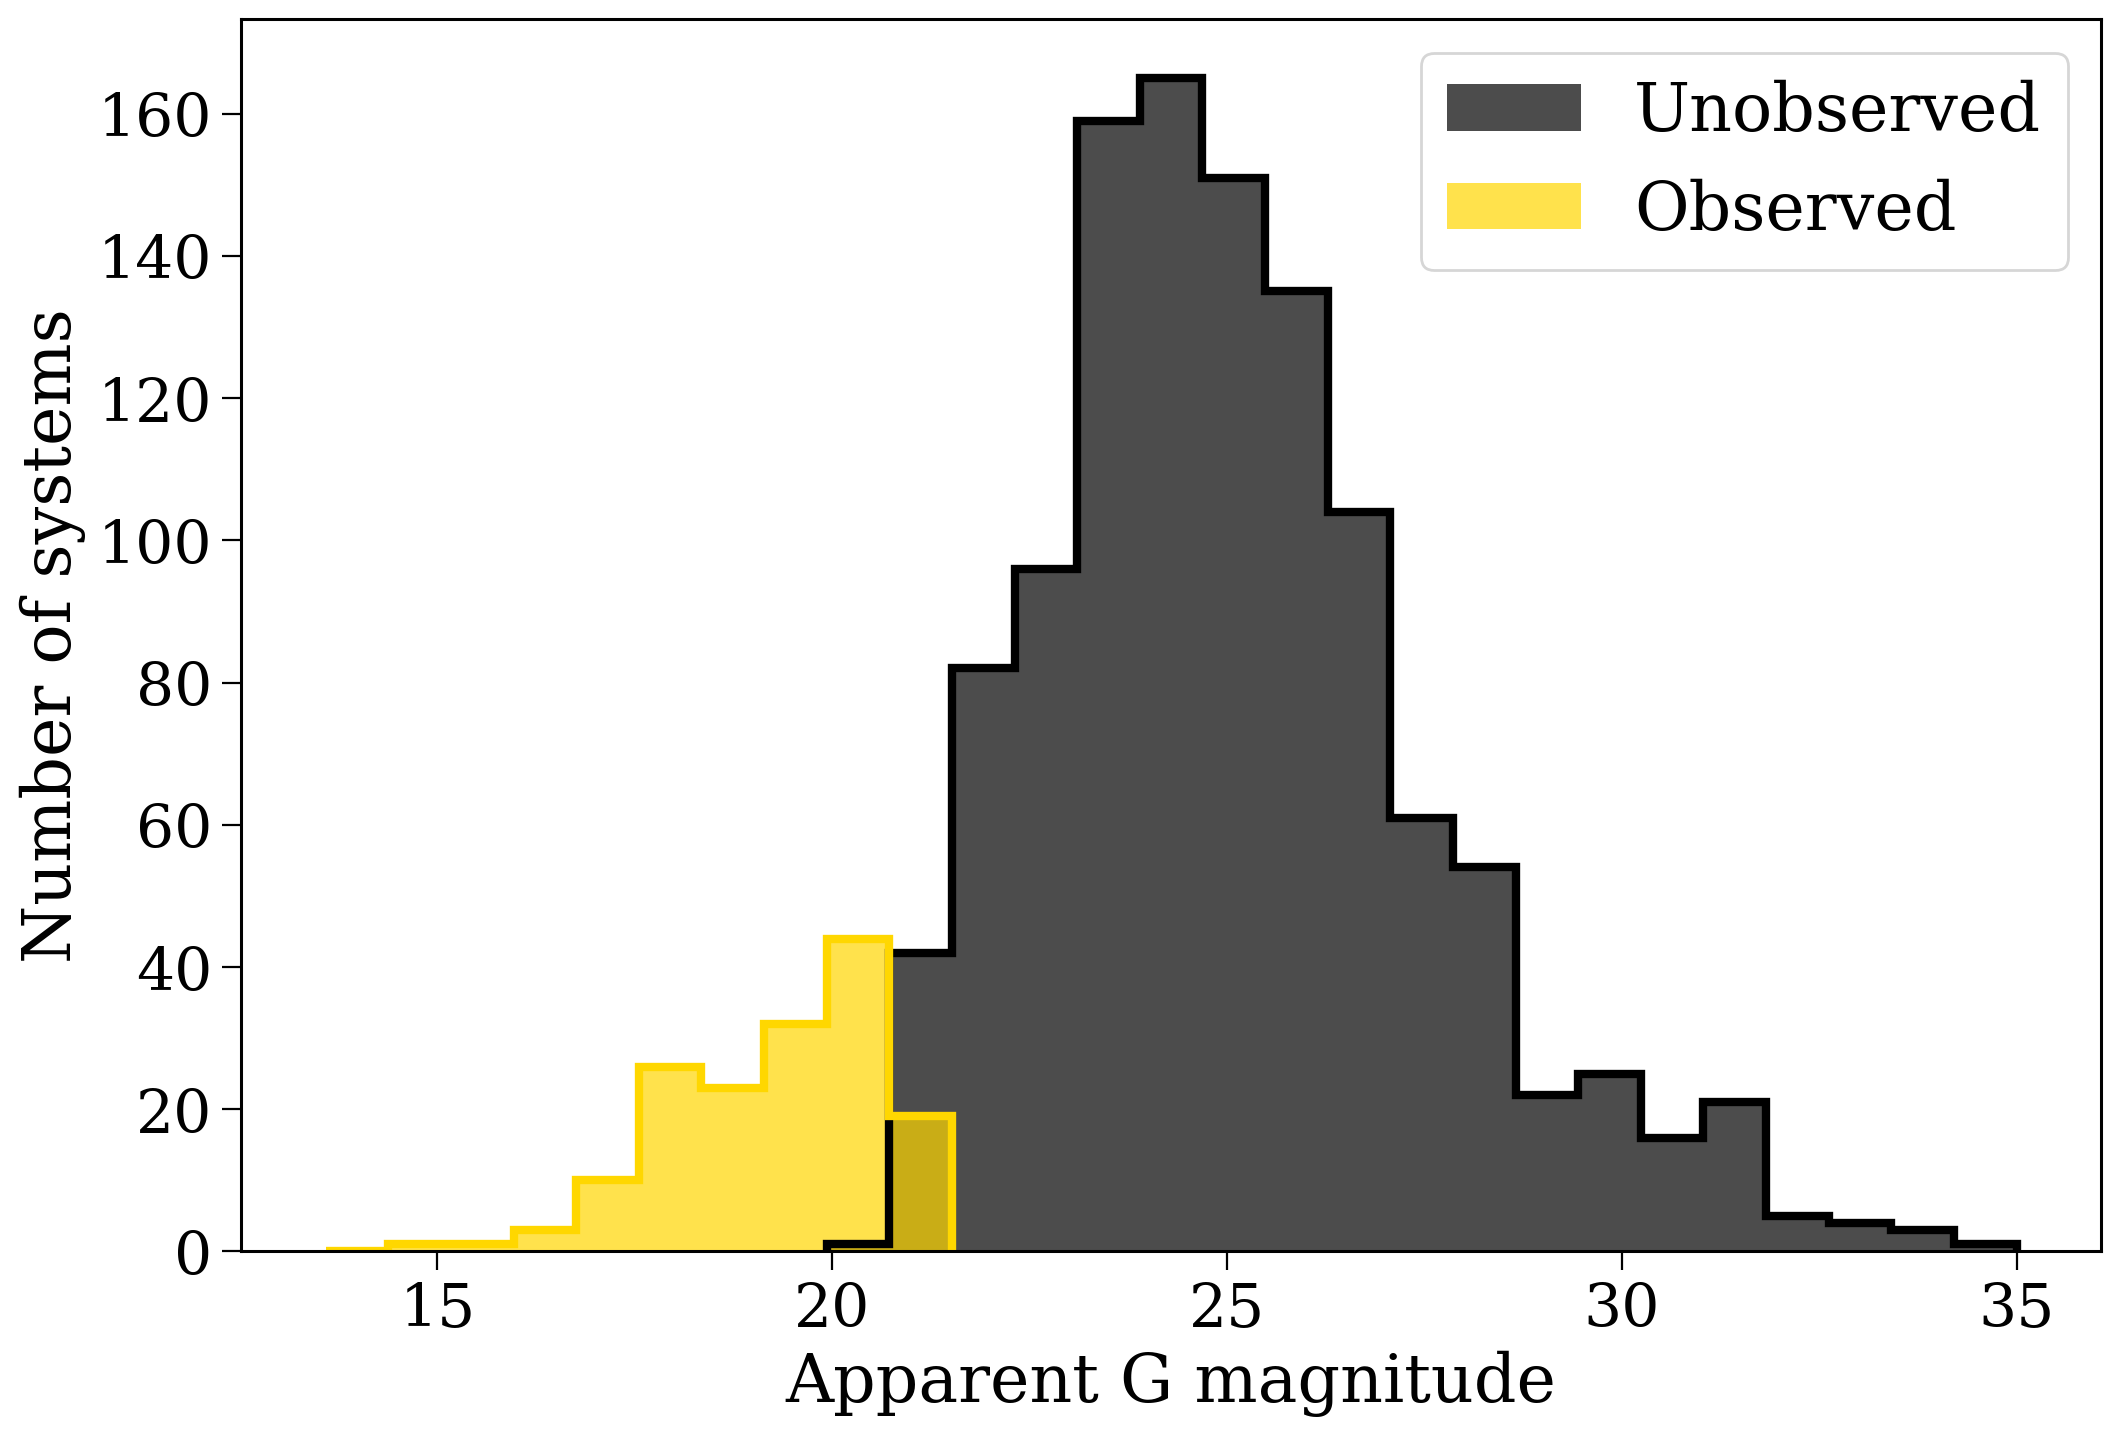

In [6]:
fig, ax = plt.subplots()

bins = np.linspace(12, 35, 30)
for G, colour, label in zip([unobs_Gs, obs_Gs],
                            ["black", "gold"],
                            ["Unobserved", "Observed"]):
    G = G[np.isfinite(G)]
    ax.hist(G, bins=bins[(bins > min(G) - 1) & (bins < max(G) + 1)],
            color=colour, alpha=0.7, label=label);
    ax.hist(G, bins=bins[(bins > min(G) - 1) & (bins < max(G) + 1)],
            color=colour, histtype="step", lw=3);
ax.legend()
ax.set(xlabel="Apparent G magnitude", ylabel="Number of systems")
plt.show()

In [7]:
f'Faintest observed magnitude: {obs_Gs.max():1.2f}'

'Faintest observed magnitude: 21.12'

In [8]:
f'Brightest unobserved magnitude: {unobs_Gs[~np.isnan(unobs_Gs)].min():1.2f}'

'Brightest unobserved magnitude: 20.52'